In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import onetile
%matplotlib inline

cdf_file = 'SPOT_canberra_downsampled.nc'
ds = xr.open_dataset(cdf_file)

In [10]:
%%time
shape = (ds.y.size, ds.x.size)

time_dimension = []
for index, step in enumerate(ds.time):
    arr = ds.isel(time=index)
    arr['ndvi_ok_mask'] = onetile.difference_index(arr.radiance.sel(band=4), 
                                                   arr.radiance.sel(band=3)) > 0.15

    mask = np.ones(shape, dtype="bool")
    masks=dict(forest=mask, shrub=~mask, grass=~mask)

    time_dimension.append(onetile.get_fmc(arr, masks, arr.sensor.item()))

fmc = xr.concat(time_dimension, dim='time')

CPU times: user 6.24 s, sys: 21.5 ms, total: 6.26 s
Wall time: 6.27 s


In [11]:
#test.lvmc_mean.plot.imshow(robust=True)

In [12]:
fmc

<xarray.Dataset>
Dimensions:    (band: 4, time: 8, x: 32, y: 40)
Coordinates:
  * band       (band) int32 1 2 3 4
  * y          (y) float64 6.105e+06 6.104e+06 6.104e+06 6.103e+06 6.103e+06 ...
  * x          (x) float64 1.352e+05 1.358e+05 1.364e+05 1.37e+05 1.376e+05 ...
  * time       (time) int64 1455060900000000000 1458949080000000000 ...
Data variables:
    lvmc_mean  (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    lvmc_stdv  (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...

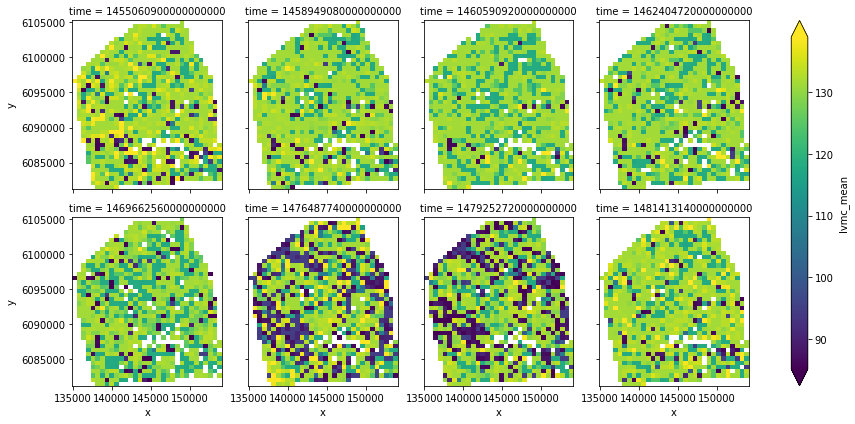

In [13]:
fmc.lvmc_mean.plot.imshow(robust=True, col='time', col_wrap=4)